In [1]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import colors as pyplotcolors
from sklearn.preprocessing import normalize
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import sktensor as skt
from scipy.sparse.linalg import svds
from scipy.misc import face
%matplotlib inline

In [2]:
import tools
reload(tools)
from tools import *

In [5]:
racc_og = face()

# Normalize across each dim
SS = StandardScaler()
racc = racc_og.copy()
print racc.shape

(768, 1024, 3)


In [6]:
# T = np.zeros((3, 4, 2))
# T[:, :, 0] = [[ 1,  4,  7, 10], [ 2,  5,  8, 11], [3,  6,  9, 12]]
# T[:, :, 1] = [[13, 16, 19, 22], [14, 17, 20, 23], [15, 18, 21, 24]]

T = skt.dtensor(racc)

Y = skt.tucker_hooi(T, [768//2, 1024//2, 3], init='nvecs')

In [8]:
Trec = np.array(skt.ttm(Y[0],Y[1]))

core_S = Y[0]
core_S = np.array(core_S)

U1 = Y[1][0]
U2 = Y[1][1]
U3 = Y[1][2]

In [9]:
core_S.shape

(384, 512, 3)

In [46]:
Trec[:,:,0].shape

(768, 1024)

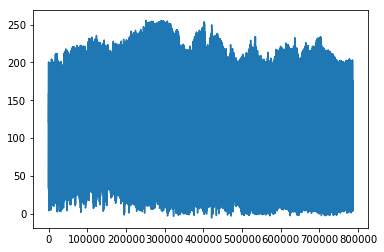

In [49]:
plt.plot(Trec[:,:,0].flatten())

In [20]:
print U1

[[ 0.54043979  0.7357025 ]
 [ 0.57659506  0.02952065]
 [ 0.61275033 -0.67666119]]
